<a href="https://colab.research.google.com/github/victoriamaccari/actividad-guiada-1/blob/master/06MBIG_AG0_b_Base_Ejercicio_San_Juan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  El Problema

Vamos a utilizar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

El objetivo del ejercicio es por un lado jugar con una red neuronal para resolver un problema de regresión y por otro participar en una competición de datos. 


# Setting Preliminares

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas. 

In [1]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns




# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

In [2]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

En primer lugar subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)


In [9]:
train = upload_files(['weekofyear', 'year'])
train.head()

Saving dengue_features_train (1).csv to dengue_features_train (1).csv
User uploaded file "dengue_features_train (1).csv" with length 287139 bytes


,,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,,,
18,1990,sj,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
19,1990,sj,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
20,1990,sj,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
21,1990,sj,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
22,1990,sj,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [13]:
df_sj = train[train['city'] == 'sj']
print(df_sj)

                city week_start_date  ...  station_min_temp_c  station_precip_mm
weekofyear year                       ...                                       
18         1990   sj      1990-04-30  ...                20.0               16.0
19         1990   sj      1990-05-07  ...                22.2                8.6
20         1990   sj      1990-05-14  ...                22.8               41.4
21         1990   sj      1990-05-21  ...                23.3                4.0
22         1990   sj      1990-05-28  ...                23.9                5.8
...              ...             ...  ...                 ...                ...
13         2008   sj      2008-03-25  ...                21.1                1.8
14         2008   sj      2008-04-01  ...                22.2                0.5
15         2008   sj      2008-04-08  ...                21.7               30.7
16         2008   sj      2008-04-15  ...                21.7               11.2
17         2008   sj      20

In [15]:
train.shape

(1456, 22)

# Preproceso

Aquí irían todas las funciones y transformaciones que permitieran el uso de las variables en los siguientes clasificadores, por ejemplo la transformación de las variables categóricas en numéricas, etc.

In [17]:
df_sj.drop("week_start_date", axis = 1, inplace = True)
df_sj.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,,
18,1990,sj,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
19,1990,sj,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
20,1990,sj,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
21,1990,sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
22,1990,sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo)

In [20]:
pd.isnull(df_sj).any()

city                                     False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [21]:
df_sj.fillna(method='ffill', inplace=True)
pd.isnull(df_sj).any()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


city                                     False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

Hay que seleccionar características, pueden ser todas, pero eso normalmente no es una buena idea, por lo que aquí dejaremos algunas seleccionadas.

In [ ]:
selected_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']

Normalizamos los datos a partir de los coeficientes mínimo y máximo de la colección de entrenamiento

In [40]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
sj_norm = scaler.fit_transform(df_sj.iloc[:,[1,20]].values)
sj_norm

array([[0.58783972, 0.05230467],
       [0.64041572, 0.02811376],
       [0.48741177, 0.13533835],
       ...,
       [0.27905297, 0.10035959],
       [0.45356528, 0.03661327],
       [0.41043739, 0.00098071]])

# Reduccion de variables -PCA

In [42]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
features= scaler.fit_transform(sj_norm)

In [63]:
#2. PCA Estimation
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features)
X_pca
X_pca.shape


(936, 2)

In [53]:
#Con dos componentes se explica el 100% de la varianza, por lo que no se pierde informacion
print(estimator.explained_variance_ratio_) 
print(sum(estimator.explained_variance_ratio_))

[0.54183989 0.45816011]
1.0


In [71]:
import numpy
pd.DataFrame(numpy.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2'], index=train.columns).reshape()

ValueError: ignored

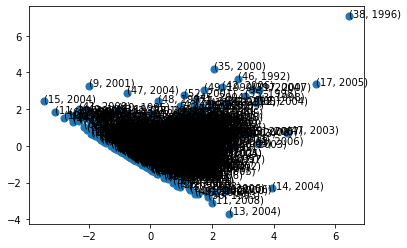

In [68]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1] ,s=50)

for i in range(0,len(X_pca)):
    ax.annotate(train.iloc[i,:].name[0:20], (X_pca[i,0], X_pca[i,1]))

In [74]:
df_feat = transpose(df_sj)
df_feat

NameError: ignored